In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path

In [163]:
# from math import pi

# from bokeh.io import output_file, show
# from bokeh.layouts import column
# from bokeh.models import ColumnDataSource, CustomJS, Slider
# from bokeh.plotting import figure

# output_file("pie.html")

# source = ColumnDataSource(data=dict(
#     start=[0, 0.2], end=[0.2, 2*pi], color=['firebrick', 'navy']
# ))

# plot = figure()
# plot.wedge(x=0, y=0, start_angle='start', end_angle='end', radius=1,
#         color='color', alpha=0.6, source=source)

# slider = Slider(start=.1, end=1., value=.2, step=.1, title="delta-V")

# def update(source=source, slider=slider, window=None):
#     data = source.data
#     data['end'][0] = slider.value
#     source.trigger('change')

# slider.js_on_change('value', CustomJS.from_py_func(update))

# show(column(slider, plot))

In [8]:
def split_profession(str):
    return str.split(',')

In [12]:
if os.path.exists('./pickles/filtered_actors.pkl'):
    print("Reading from pickle...")
    actors = pd.read_pickle("./pickles/filtered_actors.pkl")
else:
    people_df = pd.read_csv(
        './data/name.basics.tsv.gz',
        sep='\t',
        converters={'primaryProfession': split_profession}
    )
    people_prof_exploded = people_df.explode('primaryProfession')
    actors = people_prof_exploded[
        (people_prof_exploded.primaryProfession == 'actress') | (people_prof_exploded.primaryProfession == 'actor')]
    actors.to_pickle("./pickles/filtered_actors.pkl")
actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,actor,"tt0050419,tt0053137,tt0043044,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,actress,"tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,actress,"tt0049189,tt0059956,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,actor,"tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,actor,"tt0050986,tt0083922,tt0069467,tt0050976"


In [201]:
movie_cast = pd.read_pickle("./pickles/complete_cast.pkl")
imdb_movies = pd.read_pickle("./pickles/filtered_movies.pkl")
scraped_movies = pd.read_pickle("./pickles/complete_movies.pkl")
movie_ratings = pd.read_csv("./data/title.ratings.tsv.gz", sep='\t')
movie_cast

,tconst,cast,count
0,tt0788137,"[nm2213445, nm2216523, nm2212320, nm2219080, n...",6
1,tt0788133,"[nm2100867, nm1952207, nm2218383, nm5041940, n...",6
2,tt0788141,"[nm0149867, nm0708218, nm0899804]",3
3,tt0788134,"[nm1833642, nm1044987, nm2756644, nm1833094, n...",5
4,tt0790463,"[nm2214417, nm2213293]",2
...,...,...,...
538012,tt7172590,[nm7502202],1
538013,tt11088928,"[nm0608846, nm2792327, nm9117281]",3
538014,tt2577910,[nm5174887],1
538015,tt11369300,[nm11170433],1


In [202]:
movies = scraped_movies\
            .merge(imdb_movies, how='left', left_on='tconst', right_on='tconst')\
            .merge(movie_ratings, left_on='tconst', right_on='tconst', how='left')
movies

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt11379670,[],0,0,0,None,None,[],None,None,...,movie,Time to Fly,Time to Fly,0.0,\N,\N,\N,Biography,NaN,NaN
1,tt11347568,[],0,0,0,None,None,[],None,None,...,movie,VR,VR,0.0,\N,\N,\N,Horror,NaN,NaN
2,tt11238100,"[nm4225090, nm5046754, nm4436375]",0,0,0,None,None,[],None,None,...,movie,Black History is American History,Black History is American History,0.0,\N,\N,\N,Documentary,NaN,NaN
3,tt11269396,"[nm3683970, nm1479179, nm1455825]",0,0,0,None,Netherlands,[],"EUR5,000",None,...,movie,De Opnamen Van Het Schaduwloze Wezen,De Opnamen Van Het Schaduwloze Wezen,0.0,2006,\N,75,History,NaN,NaN
4,tt11379778,[],0,0,0,None,France,[],None,None,...,movie,Gala De Danse Orientale,Gala De Danse Orientale,0.0,2016,\N,52,"Documentary,Musical",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537908,tt4503096,"[nm0316284, nm2826970, nm2807641]",0,0,0,2016-03-31,Italy,[],None,"$421,624",...,movie,On Air: Storia di un Successo,On Air: Storia di un Successo,0.0,2016,\N,119,"Biography,Comedy",6.5,369.0
537909,tt4500922,"[nm3729721, nm3859624, nm2546012]",0,6,0,2018-01-26,USA,"[human experimentation, virus, post apocalypse...","$62,000,000","$288,175,335",...,movie,Maze Runner: The Death Cure,Maze Runner: The Death Cure,0.0,2018,\N,143,"Action,Sci-Fi,Thriller",6.2,97646.0
537910,tt4502426,"[nm1257460, nm2932493, nm4519154]",0,5,0,2018-06-29,Sri Lanka,[],"EUR450,000",None,...,movie,Burning Birds,Davena vihagun,0.0,2016,\N,84,Drama,7.3,63.0
537911,tt4228338,"[nm6938120, nm6938121, nm6938122]",0,0,0,2013-12-18,Belgium,[],"EUR80,000",None,...,movie,Gol de Cuba,Gol de Cuba,0.0,2013,\N,70,"Documentary,Sport",8.5,11.0


## Successful Movies

In [288]:
OSCAR_WEIGHT = 10
WIN_WEIGHT = 2
NOMINATION_WEIGHT = 1
movies['recognition'] = (movies.oscarWins * OSCAR_WEIGHT) + (movies.nominations * NOMINATION_WEIGHT) + (movies.wins *WIN_WEIGHT)
recognized_movies = movies.sort_values('recognition', ascending=False)
recognized_movies

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,recognition
137270,tt2024544,"[nm0252230, nm0931324, nm1055413]",3,330,238,2014-02-20,Netherlands,"[torture, kidnapping, racism, whipping, slaver...","$20,000,000","$187,733,202",...,12 Years a Slave,12 Years a Slave,0.0,2013,\N,134,"Biography,Drama,History",8.1,593942.0,836
532918,tt3783958,"[nm0331516, nm1297015, nm1679669]",6,268,233,2016-12-25,USA,"[los angeles california, pianist, aspiring act...","$30,000,000","$446,092,357",...,La La Land,La La Land,0.0,2016,\N,128,"Comedy,Drama,Music",8.0,455872.0,794
523662,tt4975722,"[nm0991810, nm0365140, nm5218990]",3,281,223,2016-11-18,USA,"[bullying, gay lead character, african america...","$4,000,000","$65,046,687",...,Moonlight,Moonlight,0.0,2016,\N,111,Drama,7.4,240329.0,757
9395,tt1392190,"[nm0362766, nm0000234, nm0396558]",6,220,232,2015-05-14,Netherlands,"[post apocalypse, desert, chase, female warrio...","$150,000,000","$375,209,362",...,Mad Max: Fury Road,Mad Max: Fury Road,0.0,2015,\N,120,"Action,Adventure,Sci-Fi",8.1,808474.0,744
125615,tt1454468,"[nm0000113, nm0000123, nm0000438]",7,177,233,2013-10-23,France,"[female protagonist, space station, sole survi...","$100,000,000","$723,192,705",...,Gravity,Gravity,0.0,2013,\N,91,"Drama,Sci-Fi,Thriller",7.7,727719.0,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189271,tt0054356,"[nm0088946, nm0127113, nm0353757]",0,0,0,1961-01-20,Finland,[],None,None,...,Susanne,Susanne,0.0,1960,\N,87,Drama,4.5,24.0,0
189270,tt0054308,"[nm0310618, nm0865063, nm0051060]",0,0,0,1960-11-23,Yugoslavia,[],None,None,...,Signal Over the City,Signali nad gradom,0.0,1960,\N,91,"Action,Drama,War",7.2,59.0,0
189268,tt0054304,"[nm0496856, nm0466977, nm0266949]",0,0,0,1961-03-11,Italy,[],None,None,...,Blood Feud,Il sicario,0.0,1961,\N,87,Drama,7.1,21.0,0
189267,tt0054332,[],0,0,0,None,None,[],None,None,...,Spartakiáda,Spartakiáda,0.0,1956,\N,88,Documentary,NaN,NaN,0


Text(0.5, 0, 'Recognition score')

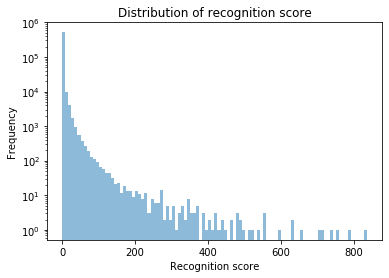

In [289]:
fig, ax = plt.subplots()
recognized_movies.recognition.plot.hist(ax=ax, bins=100, alpha=0.5)
ax.set_yscale('log')
ax.set_title('Distribution of recognition score')
ax.set_xlabel('Recognition score')

We can see that for a vast majority of the movies, either they have never got nominated for, or won any awards or IMDB does not have the award related information for those movies

In [290]:
CUT_OFF_THRESH = 0.1
top_recognized_movies = recognized_movies[:int(len(recognized_movies) * CUT_OFF_THRESH)]
top_recognized_movies.tail()

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,recognition
377136,tt5646302,[],0,0,0,None,None,[],None,None,...,La Sombra del Fugitivo,La Sombra del Fugitivo,0.0,\N,\N,\N,Drama,NaN,NaN,0
377135,tt5648614,[],0,0,0,None,None,[],None,None,...,The Heart of an Artist,The Heart of an Artist,0.0,\N,\N,\N,Documentary,NaN,NaN,0
291841,tt0009746,[],0,0,0,1918-09-22,USA,[],None,None,...,Unknown Switzerland,Unknown Switzerland,0.0,1918,\N,\N,Documentary,NaN,NaN,0
377134,tt5648160,"[nm2349311, nm5511575, nm8082996]",0,0,0,2017-07-21,Turkey,[],None,"$6,629",...,Kiki ile Miki Alatura,Kiki ile Miki Alatura,0.0,2017,\N,90,Comedy,6.7,11.0,0
291842,tt0009753,"[nm0533712, nm0632160, nm0390366]",0,0,0,1918-12-07,USA,[],None,None,...,The Vanity Pool,The Vanity Pool,0.0,1918,\N,60,Drama,NaN,NaN,0


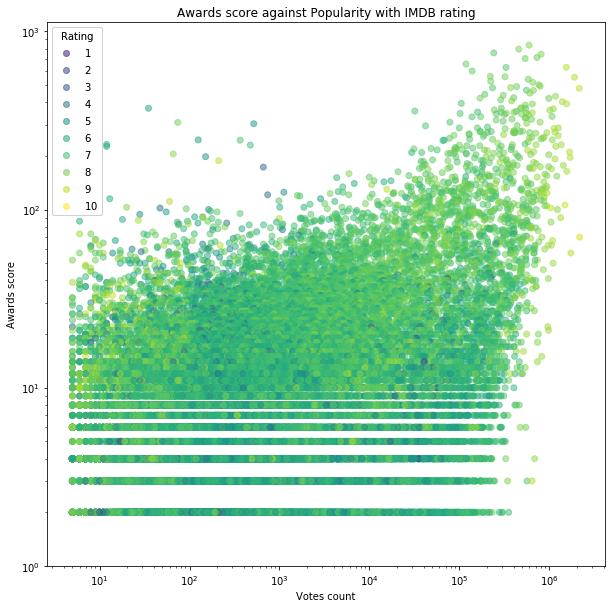

In [297]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

scatter = ax.scatter(top_recognized_movies['numVotes'],
            top_recognized_movies['recognition'],
            alpha=0.5,
            c=top_recognized_movies['averageRating'],
            vmin=0, vmax=10)
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="upper left", title="Rating")
ax.add_artist(legend1)
ax.set_title("Awards score against Popularity with IMDB rating")    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Votes count')
ax.set_ylabel('Awards score')
ax.set_ylim(bottom=1)
plt.show()

In [228]:
top_recognized_movies = top_recognized_movies.dropna(subset=['numVotes'])
recognized_pop_movies = top_recognized_movies.sort_values('numVotes', ascending=False)
recognized_pop_movies

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,recognition
337760,tt0111161,"[nm0000209, nm0000151, nm0348409]",0,32,19,1995-03-02,Netherlands,"[wrongful imprisonment, escape from prison, ba...","$25,000,000","$28,781,790",...,The Shawshank Redemption,The Shawshank Redemption,0.0,1994,\N,142,Drama,9.3,2166813.0,70
72423,tt0468569,"[nm0000288, nm0005132, nm0001173]",2,155,152,2008-08-21,Germany,"[dc comics, psychopath, clown, joker, scarred ...","$185,000,000","$1,004,934,033",...,The Dark Knight,The Dark Knight,0.0,2008,\N,152,"Action,Crime,Drama",9.0,2141754.0,479
8333,tt1375666,"[nm0000138, nm0330687, nm0680983]",4,208,152,2010-07-16,Canada,"[dream, subconscious, ambiguous ending, thief,...","$160,000,000","$829,895,144",...,Inception,Inception,0.0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,1899350.0,552
347798,tt0137523,"[nm0000093, nm0001570, nm0001533]",0,37,10,1999-11-10,France,"[surprise ending, fighting, multiple personali...","$63,000,000","$101,187,217",...,Fight Club,Fight Club,0.0,1999,\N,139,Drama,8.8,1731160.0,57
337596,tt0110912,"[nm0000237, nm0000235, nm0000168]",0,70,63,1994-12-01,Netherlands,"[nonlinear timeline, overdose, drug overdose, ...","$8,000,000","$214,179,088",...,Pulp Fiction,Pulp Fiction,0.0,1994,\N,154,"Crime,Drama",8.9,1701267.0,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369647,tt7018506,"[nm7169909, nm4497892, nm6895733]",0,0,0,2019-07-12,USA,[],"$2,000",None,...,Static: Dawn of the Meta-Breed,Static: Dawn of the Meta-Breed,0.0,2019,\N,30,"Action,Adventure,Sci-Fi",8.2,5.0,0
147698,tt0427637,"[nm0688093, nm0797569, nm1008648]",0,4,0,1985-11-21,Philippines,[],None,None,...,Partida,Partida,0.0,1985,\N,\N,"Action,Sport",6.2,5.0,4
264315,tt0213962,"[nm0093971, nm0429770, nm0789271]",0,0,2,None,None,[],None,None,...,Oh Freedom After While,Oh Freedom After While,0.0,1999,\N,59,Documentary,8.0,5.0,4
519983,tt3209894,"[nm3587323, nm1943233, nm4870810]",0,8,2,2013-12-18,Philippines,[],None,None,...,Mga anino ng kahapon,Mga anino ng kahapon,0.0,2013,\N,85,"Drama,Family",4.8,5.0,12




## Movie Cast Analysis

In [19]:
movie_cast_expl = movie_cast.explode('cast')
movie_cast_expl

,tconst,cast,count
0,tt0788137,nm2213445,6
0,tt0788137,nm2216523,6
0,tt0788137,nm2212320,6
0,tt0788137,nm2219080,6
0,tt0788137,nm2214137,6
...,...,...,...
538015,tt11369300,nm11170433,1
538016,tt10294344,nm0015321,4
538016,tt10294344,nm0015440,4
538016,tt10294344,nm0461981,4


In [27]:
cast_info = movie_cast_expl.merge(actors, left_on='cast', right_on='nconst', how='inner')

In [33]:
cast_info

,tconst,cast,count,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0788133,nm2100867,6,nm2100867,Janine Chun-Ning Chang,1982,\N,actress,"tt8791742,tt7070302,tt1239313,tt0486480"
1,tt0788250,nm2100867,5,nm2100867,Janine Chun-Ning Chang,1982,\N,actress,"tt8791742,tt7070302,tt1239313,tt0486480"
2,tt1051267,nm2100867,12,nm2100867,Janine Chun-Ning Chang,1982,\N,actress,"tt8791742,tt7070302,tt1239313,tt0486480"
3,tt1909830,nm2100867,8,nm2100867,Janine Chun-Ning Chang,1982,\N,actress,"tt8791742,tt7070302,tt1239313,tt0486480"
4,tt3421246,nm2100867,38,nm2100867,Janine Chun-Ning Chang,1982,\N,actress,"tt8791742,tt7070302,tt1239313,tt0486480"
...,...,...,...,...,...,...,...,...,...
6277468,tt8710596,nm10959710,43,nm10959710,Michael Stanton,\N,\N,actor,"tt4572514,tt1289401,tt4465572,tt8710596"
6277469,tt8710596,nm9505963,43,nm9505963,Ed LaVache,\N,\N,actor,\N
6277470,tt8710596,nm10364750,43,nm10364750,John Miranda,\N,\N,actor,tt8784956
6277471,tt8710596,nm10483754,43,nm10483754,Brooke Arcadio Navarro,\N,\N,actress,tt8834580


In [94]:
# tconst_prof = cast_info[0:5000].groupby(['tconst','primaryProfession']).size()
# tconst_prof.get('tt0000941')

primaryProfession
actor    1
dtype: int64

In [112]:
# Groupby will not show when one of the value is 0. so do a pivot
tconst_genders = cast_info.pivot_table(index='tconst', 
                     columns='primaryProfession', 
                     values='count',
                     fill_value=0, 
                     aggfunc='count')
# tconst_genders.loc['tt0000941']
tconst_genders

primaryProfession,actor,actress
tconst,,
tt0000009,2,1
tt0000147,1,0
tt0000335,5,1
tt0000502,2,0
tt0000574,12,3
...,...,...
tt9916538,11,4
tt9916622,2,0
tt9916680,6,2


In [130]:
tconst_genders['total'] = tconst_genders['actor'] + tconst_genders['actress']
tconst_genders['male'] = tconst_genders['actor'] / tconst_genders['total']
tconst_genders['female'] = tconst_genders['actress'] / tconst_genders['total']

In [131]:
with pd.option_context('display.max_rows', 5000, 'display.max_columns', 20):
    display(tconst_genders)

primaryProfession,actor,actress,male,female,total
tconst,,,,,
tt0000009,2,1,0.666667,0.333333,3
tt0000147,1,0,1.000000,0.000000,1
tt0000335,5,1,0.833333,0.166667,6
tt0000502,2,0,1.000000,0.000000,2
tt0000574,12,3,0.800000,0.200000,15
...,...,...,...,...,...
tt9916538,11,4,0.733333,0.266667,15
tt9916622,2,0,1.000000,0.000000,2
tt9916680,6,2,0.750000,0.250000,8


Text(0.5, 0, 'Cast count')

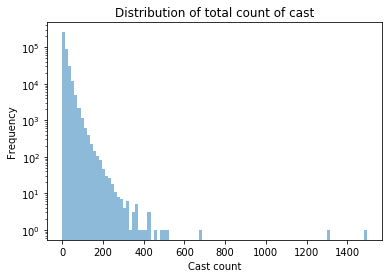

In [188]:
fig, ax = plt.subplots()
tconst_genders.total.plot.hist(ax=ax, bins=100, alpha=0.5)
ax.set_yscale('log')
ax.set_title('Distribution of total count of cast')
ax.set_xlabel('Cast count')

We can see that many of the movies, the cast information is missing. Hence, is safe to assume that the ones that have a very low number of cast members cannot be considered as credible datapoints for an analys. So here onwards, we will use the movies that has a cast count of more than 10 for the gender based analysis.

Text(0.5, 0, 'Gender percentage')

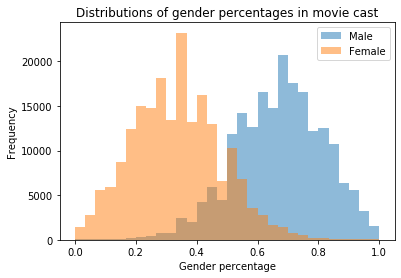

In [161]:
# Consider movies that have a total cast count of atleast 10 since the rest do not seem like credible
tconst_genders_cred = tconst_genders[tconst_genders.total > 10]
ax = tconst_genders_cred[['male', 'female']].plot.hist(bins=30, alpha=0.5)
ax.set_title('Distributions of gender percentages in movie cast')
ax.legend(['Male', 'Female'])
ax.set_xlabel('Gender percentage')

In general females are underrepresented in the cast of movies. The following pie chart demonstrates the mean representation percentage of both the genders.

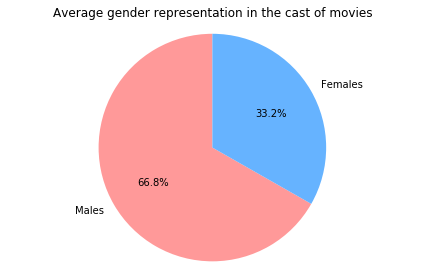

In [158]:
mean_males = tconst_genders_cred.male.mean()
labels = ['Males', 'Females']
sizes = [mean_males, 1 - mean_males]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  
ax1.set_title('Average gender representation in the cast of movies')
plt.tight_layout()
plt.show()

Next we check if this situation is different in the successful movies

## Movie Ratings Analysis

In [203]:
movie_votes = movies.dropna(subset=['numVotes'])
movie_votes = movie_votes.astype({'numVotes': 'int32'})
movie_votes

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
42,tt11216664,"[nm11100385, nm11100384, nm11100383]",0,0,0,2019-01-05,USA,[],"$10,000",None,...,movie,Sick School,Sick School,0.0,2019,\N,46,Documentary,7.2,18
48,tt11296054,"[nm11159340, nm11137407, nm11159342]",0,0,0,2019-11-22,India,[],"INR1,000,000",None,...,movie,Beach Road Chetan,Beach Road Chetan,0.0,2019,\N,137,"Action,Drama,Sci-Fi",8.6,39
49,tt3015100,"[nm4977285, nm0371154, nm5475873]",0,0,0,2013-05-12,USA,[],None,None,...,movie,Unnecessary Meanness,Unnecessary Meanness,0.0,2013,\N,\N,Drama,7.5,15
54,tt3014910,"[nm0000104, nm0796316, nm0000391]",0,0,0,2016-04-01,Spain,[],"EUR8,500,000","$1,341,205",...,movie,Finding Altamira,Altamira,0.0,2016,\N,97,"Biography,Drama,History",5.9,2188
63,tt11351822,"[nm11163867, nm10090121, nm9247610]",0,0,0,2019-11-28,Malaysia,[],None,None,...,movie,Metro Maalai,Metro Maalai,0.0,2019,\N,101,"Drama,Romance",9.3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537908,tt4503096,"[nm0316284, nm2826970, nm2807641]",0,0,0,2016-03-31,Italy,[],None,"$421,624",...,movie,On Air: Storia di un Successo,On Air: Storia di un Successo,0.0,2016,\N,119,"Biography,Comedy",6.5,369
537909,tt4500922,"[nm3729721, nm3859624, nm2546012]",0,6,0,2018-01-26,USA,"[human experimentation, virus, post apocalypse...","$62,000,000","$288,175,335",...,movie,Maze Runner: The Death Cure,Maze Runner: The Death Cure,0.0,2018,\N,143,"Action,Sci-Fi,Thriller",6.2,97646
537910,tt4502426,"[nm1257460, nm2932493, nm4519154]",0,5,0,2018-06-29,Sri Lanka,[],"EUR450,000",None,...,movie,Burning Birds,Davena vihagun,0.0,2016,\N,84,Drama,7.3,63
537911,tt4228338,"[nm6938120, nm6938121, nm6938122]",0,0,0,2013-12-18,Belgium,[],"EUR80,000",None,...,movie,Gol de Cuba,Gol de Cuba,0.0,2013,\N,70,"Documentary,Sport",8.5,11


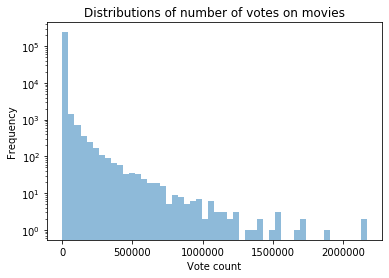

In [205]:
ax = movie_votes['numVotes'].plot.hist(bins=50, alpha=0.5)
ax.set_title('Distributions of number of votes on movies')
ax.set_xlabel('Vote count')
ax.set_yscale('log')

Here also we see that for a vast majority of the movies, the vote count is either missing or the movie did not get any votes at all on IMDB

In [206]:
most_popular = movie_votes.sort_values('numVotes', ascending=False)

In [207]:
with pd.option_context('display.max_rows', 5000, 'display.max_columns', 20):
    display(most_popular[:1000])

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
337760,tt0111161,"[nm0000209, nm0000151, nm0348409]",0,32,19,1995-03-02,Netherlands,"[wrongful imprisonment, escape from prison, ba...","$25,000,000","$28,781,790",...,movie,The Shawshank Redemption,The Shawshank Redemption,0.0,1994,\N,142,Drama,9.3,2166813
72423,tt0468569,"[nm0000288, nm0005132, nm0001173]",2,155,152,2008-08-21,Germany,"[dc comics, psychopath, clown, joker, scarred ...","$185,000,000","$1,004,934,033",...,movie,The Dark Knight,The Dark Knight,0.0,2008,\N,152,"Action,Crime,Drama",9.0,2141754
8333,tt1375666,"[nm0000138, nm0330687, nm0680983]",4,208,152,2010-07-16,Canada,"[dream, subconscious, ambiguous ending, thief,...","$160,000,000","$829,895,144",...,movie,Inception,Inception,0.0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,1899350
347798,tt0137523,"[nm0000093, nm0001570, nm0001533]",0,37,10,1999-11-10,France,"[surprise ending, fighting, multiple personali...","$63,000,000","$101,187,217",...,movie,Fight Club,Fight Club,0.0,1999,\N,139,Drama,8.8,1731160
337596,tt0110912,"[nm0000237, nm0000235, nm0000168]",0,70,63,1994-12-01,Netherlands,"[nonlinear timeline, overdose, drug overdose, ...","$8,000,000","$214,179,088",...,movie,Pulp Fiction,Pulp Fiction,0.0,1994,\N,154,"Crime,Drama",8.9,1701267
336925,tt0109830,"[nm0000158, nm0000705, nm0000641]",6,68,41,1994-09-22,Netherlands,"[vietnam war, amputee, war hero, vietnam, moth...","$55,000,000","$678,151,134",...,movie,Forrest Gump,Forrest Gump,0.0,1994,\N,142,"Drama,Romance",8.8,1668795
345651,tt0133093,"[nm0000206, nm0000401, nm0005251]",4,50,37,1999-06-17,Netherlands,"[simulated reality, artificial reality, war wi...","$63,000,000","$465,343,787",...,movie,The Matrix,The Matrix,0.0,1999,\N,136,"Action,Sci-Fi",8.7,1559856
236932,tt0120737,"[nm0000704, nm0005212, nm0089217]",4,124,114,2001-12-19,USA,"[ring, quest, hobbit, elf, orc, sword and sorc...","$93,000,000","$872,491,916",...,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0.0,2001,\N,178,"Adventure,Drama,Fantasy",8.8,1553581
253088,tt0167260,"[nm0000704, nm0001557, nm0005212]",11,122,198,2003-12-17,Sweden,"[orc, epic, battle, journey, hobbit]","$94,000,000","$1,120,424,614",...,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0.0,2003,\N,201,"Adventure,Drama,Fantasy",8.9,1538398
314077,tt0068646,"[nm0000008, nm0000199, nm0001001]",3,28,24,1972-09-27,Sweden,"[mafia, crime family, patriarch, organized cri...","$6,000,000","$246,120,974",...,movie,The Godfather,The Godfather,0.0,1972,\N,175,"Crime,Drama",9.2,1487817
